# Fairlearn API for tabular data

## Table of Contents
* [Introduction](#Introduction)
* [Prepare tabular data](#prepare)
* [Train model without fairness](#Fairlearn)
* [Train model with fairness](#Fairness)

## Introduction
<a id='Introduction'></a> 

AI systems can behave unfairly for a variety of reasons. Sometimes it is because of societal biases reflected in the training data and in the decisions made during the development and deployment of these systems. In other cases, AI systems behave unfairly not because of societal biases, but because of characteristics of the data (e.g., too few data points about some group of people) or characteristics of the systems themselves. It can be hard to distinguish between these reasons, especially since they are not mutually exclusive and often exacerbate one another. Therefore, we define whether an AI system is behaving unfairly in terms of its impact on people — i.e., in terms of harms — and not in terms of specific causes, such as societal biases, or in terms of intent, such as prejudice.

`arcgis.learn` users will now be able to use Fairlearn for classification or regression problems involving tabular data. The AutoML implementation in `arcgis.learn` usage Fairlearn library which is an open source library.

## Prepare tabular data
<a id='prepare'></a>

Data can be [feature layer](https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/) or a simple dataframe. The data for Fairness with `arcgis.learn` api is prepared the same way it is prepared for [supervised learning ML Models](https://developers.arcgis.com/python/guide/ml-and-dl-on-tabular-data/).


In [1]:
import pandas as pd
import numpy as np 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.compose import make_column_transformer 
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline

from folktables import ACSDataSource, ACSEmployment, ACSIncome, generate_categories
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
from arcgis.learn import MLModel, prepare_tabulardata 
from arcgis.gis import GIS

In [3]:
#gis=GIS('home') #https://geosaurus.maps.arcgis.com

In [4]:
gis = GIS('https://geosaurus.maps.arcgis.com','arcgis_python','amazing_arcgis_123')

In [5]:
#gis = GIS('https://geosaurus.maps.arcgis.com','api_data_owner','donot3xposeme')

<Item title:"i_acs_data" type:CSV owner:praj_deldev>
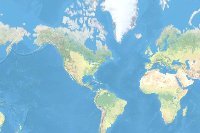

In [6]:
acs_income_df = gis.content.get("94b35471a6f74f63a08184c9144bb1a7")
acs_income_df

In [7]:
acs_df = pd.read_csv(acs_income_df.get_data())

In [8]:
acs_df

,Gender,Race,Age,Occupation,Relationship,Marital status,Educational attainment,Place of birth,Class of worker,Hours worked hour per week,Income
0,Male,Black or Other,Under 40,9610.0,16.0,1.0,14.0,6.0,6.0,40.0,False
1,Male,White,Under 40,1970.0,17.0,5.0,16.0,6.0,4.0,20.0,False
2,Male,White,Over 40,2040.0,17.0,5.0,22.0,6.0,2.0,8.0,False
3,Male,White,Under 40,9610.0,16.0,3.0,14.0,36.0,1.0,40.0,False
4,Female,White,Under 40,1021.0,17.0,5.0,19.0,6.0,2.0,18.0,False
...,...,...,...,...,...,...,...,...,...,...,...
195660,Male,Black or Other,Under 40,1021.0,0.0,1.0,22.0,210.0,1.0,40.0,True
195661,Female,Black or Other,Under 40,1021.0,1.0,1.0,22.0,210.0,1.0,40.0,True
195662,Male,White,Over 40,5240.0,0.0,1.0,19.0,17.0,1.0,45.0,True
195663,Male,Black or Other,Over 40,2040.0,0.0,1.0,24.0,207.0,7.0,45.0,False


In [9]:
acs_df.columns

Index(['Gender', 'Race', 'Age', 'Occupation', 'Relationship', 'Marital status',
       'Educational attainment', 'Place of birth', 'Class of worker',
       'Hours worked hour per week', 'Income'],
      dtype='object')

In [10]:
#acs_df = acs_df[['Age', 'Class_of_worker', 'Educational_attainment', 'Gender', 'Hours_worked_hour_per_week', 'Marital_status', 'ObjectId', 'Occupation', 'Place_of_birth', 'Race',	'Income']]
acs_df = acs_df[['Gender', 'Race', 'Age', 'Occupation', 'Relationship', 'Marital status',
       'Educational attainment', 'Place of birth', 'Class of worker',
       'Hours worked hour per week', 'Income']]

In [11]:
acs_df.head()

,Gender,Race,Age,Occupation,Relationship,Marital status,Educational attainment,Place of birth,Class of worker,Hours worked hour per week,Income
0,Male,Black or Other,Under 40,9610.0,16.0,1.0,14.0,6.0,6.0,40.0,False
1,Male,White,Under 40,1970.0,17.0,5.0,16.0,6.0,4.0,20.0,False
2,Male,White,Over 40,2040.0,17.0,5.0,22.0,6.0,2.0,8.0,False
3,Male,White,Under 40,9610.0,16.0,3.0,14.0,36.0,1.0,40.0,False
4,Female,White,Under 40,1021.0,17.0,5.0,19.0,6.0,2.0,18.0,False


In [12]:
test_size = 0.25
train, test = train_test_split(acs_df, test_size = 0.25)

In [13]:
X = [('Age',True),('Occupation',True),('Race',True),('Gender',True), 'Hours worked hour per week',('Class of worker',True),('Marital status',True)]

In [14]:
data = prepare_tabulardata(train,
                           'Income',
                           explanatory_variables=X,                           
                           #preprocessors=preprocessors
                           )

C:\arcgispro\bin\Python\envs\arclone\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1641: UserWarning: Dataframe is not spatial, Rasters and distance layers will not work
  warnings.warn(
C:\arcgispro\bin\Python\envs\arclone\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1372: UserWarning: Changing column Occupation to continuous
  warnings.warn(f"Changing column {column} to continuous")
C:\arcgispro\bin\Python\envs\arclone\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1372: UserWarning: Changing column Marital status to continuous
  warnings.warn(f"Changing column {column} to continuous")
C:\arcgispro\bin\Python\envs\arclone\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1372: UserWarning: Changing column Class of worker to continuous
  warnings.warn(f"Changing column {column} to continuous")


### [Train model without fairness](#Fairlearn)

In [15]:
salary_classifier = MLModel(data, "lightgbm.LGBMClassifier", fairness_args=None, n_estimators=500, random_state=43)

After creating the MLModel object by passing the data obtained from `prepare_tabulardata` and using default value or None  for fairness_args, now we proceed to train the model without using Fairness. This is done by calling the `fit` method as shown below. 

In [16]:
salary_classifier.fit()

In [17]:
scores = []

#### After fitting the model, Fairness score is calculated for the protected attributes. We provide plots for following metrics.

Performance metrics:

        1. accuracy
        2. false positive rate
        3. false negative rate
        4. selection rate
        5. count

Fairness metrcis:
    
        1. equalized_odds_difference
        2. demographic_parity_difference
        3. equalized_odds_ratio
        4. demographic_parity_ratio
    


We also prvide summary of the fairness score which help to analyze the results.

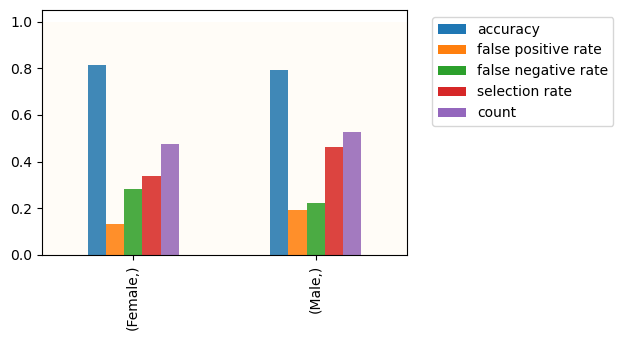

(           accuracy  false positive rate  false negative rate  selection rate  \
 (Female,)  0.815416             0.130357             0.282268        0.340032   
 (Male,)    0.794369             0.191695             0.221817        0.463025   
 
               count  
 (Female,)  0.474753  
 (Male,)    0.525247  ,
 {'equalized_odds_difference': (0.06,
   'The value of equalized_odds_difference is 0.06 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.'),
  'demographic_parity_difference': (0.12,
   'The value of demographic_parity_difference is 0.12 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.'),
  'equalized_odds_ratio': (0.68,
   'The value of equalized_odds_ratio is 0.68 which is less than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.'),
  'demographic_parity_rati

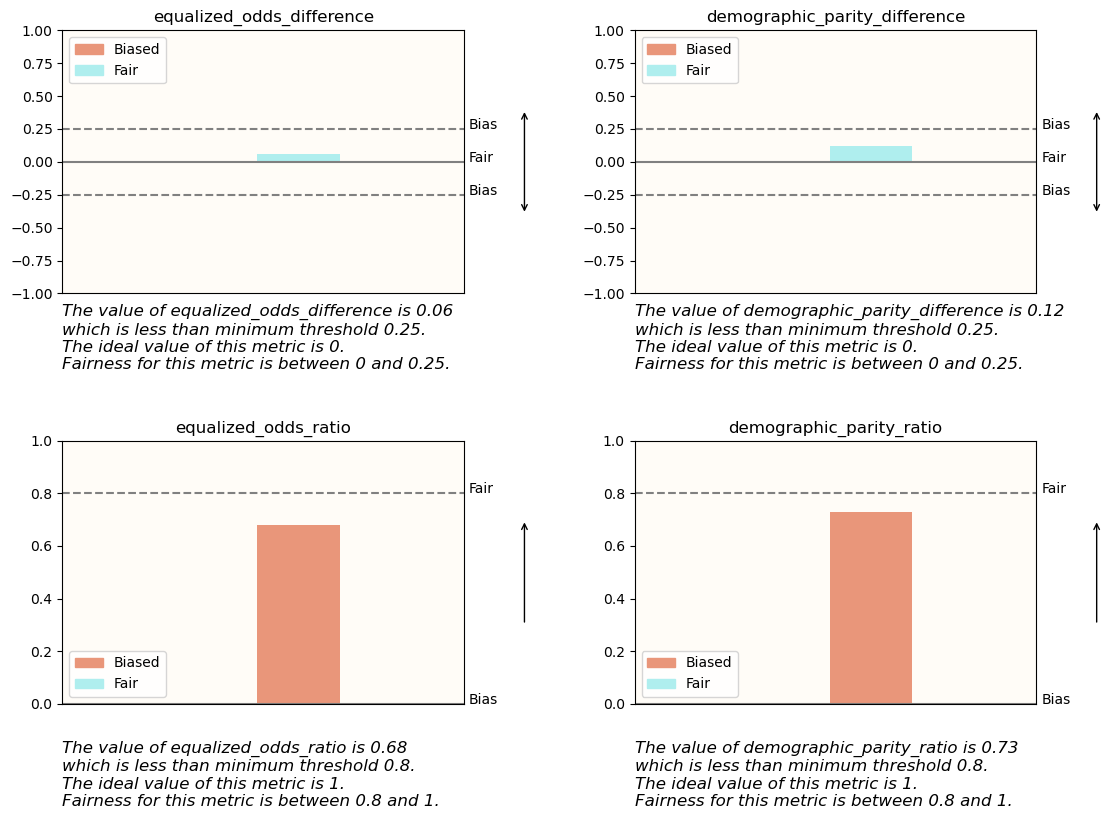

In [18]:
score = salary_classifier.fairness_score(sensitive_feature = 'Gender',visualize=True)
scores.append(("unmitigated",score[1]))
score

### [Train model with fairness](#Fairness)

##### Observations
1. `equalized_odds_difference` : 0.08,
   Explanation : The value of equalized_odds_difference is 0.08 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.

2. `demographic_parity_difference` : 0.13,
   Explanation :The value of demographic_parity_difference is 0.13 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25

3. `equalized_odds_ratio` : 0.73,
   Explanation :The value of equalized_odds_ratio is 0.73 which is less than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.
4. `demographic_parity_ratio` : 0.71,
   Explanation : The value of demographic_parity_ratio is 0.71 which is less than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.

Fairness_args in MLModel class accepts the following paramters as fairness_args while initialization :
- data (Required Paramter): Returned data object from `prepare_tabulardata` function in the previous step.
    
    Keyword Args:                   Value Args:
        <sensitive_feature> str:        Protected class column or feature name
        <mitigation_type> str:          `reweighing`, `threshold_optimizer` , `exponentiated_gradient`
        <mitigation_constraint> str:    demographic_parity

For example:
                            
    fairness_args = {
                    'sensitive_feature': sensitive_feature,
                    'mitigation_type': "threshold_optimizer" or  "exponentiated_gradient" , "reweighing",
                    'mitigation_constraint':'demographic_parity' or
                                            'equalized_odds' or
                                            'selection_rate_parity' or
                                            'false_positive_rate_parity' or
                                            'true_negative_rate_parity' or
                                            'equalized_odds'
                    }

#### Using `Threshold Optimizer` as a bias mitigation technique. 

In [19]:
fairness_args = {
    'sensitive_feature': 'Gender',  
    'mitigation_type': "threshold_optimizer", #exponentiated_gradient , #reweighing
    'mitigation_constraint':'demographic_parity'
}
model=MLModel(data,"lightgbm.LGBMClassifier",fairness_args=fairness_args)

In [20]:
model.fit()

Fitting with threshold_optimizer


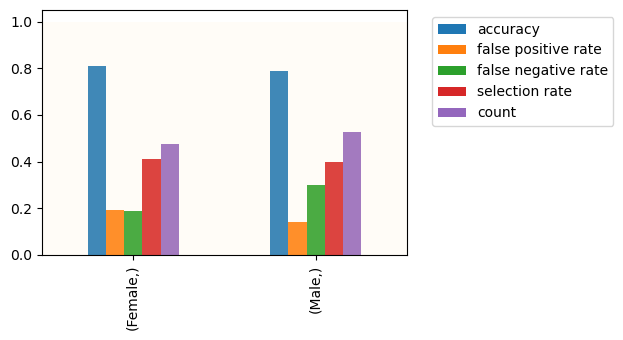

(           accuracy  false positive rate  false negative rate  selection rate  \
 (Female,)  0.809244             0.191295             0.189787        0.412229   
 (Male,)    0.787623             0.138580             0.298093        0.399196   
 
               count  
 (Female,)  0.474753  
 (Male,)    0.525247  ,
 {'equalized_odds_difference': (0.11,
   'The value of equalized_odds_difference is 0.11 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.'),
  'demographic_parity_difference': (0.01,
   'The value of demographic_parity_difference is 0.01 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.'),
  'equalized_odds_ratio': (0.72,
   'The value of equalized_odds_ratio is 0.72 which is less than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.'),
  'demographic_parity_rati

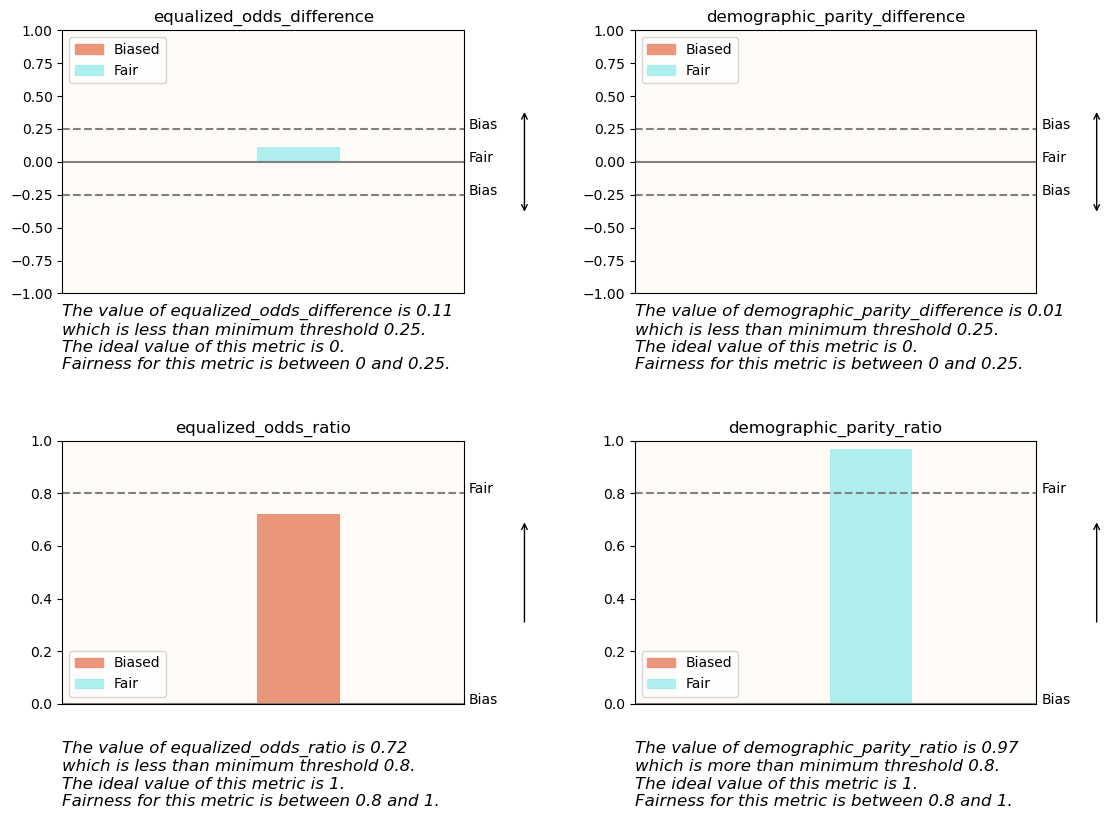

In [21]:
score = model.fairness_score(sensitive_feature = 'Gender',visualize=True)
scores.append(("threshold_optimizer",score[1]))
score

##### Observations
1. `equalized_odds_difference` : 0.08
   Explanation : The value of equalized_odds_difference is 0.08 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.

2. `demographic_parity_difference` : 0.00
   Explanation :The value of demographic_parity_difference is 0.00 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.

3. `equalized_odds_ratio` : 0.69
   Explanation :The value of equalized_odds_ratio is 0.69 which is less than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.

4. `demographic_parity_ratio` : 1.0
   Explanation : The value of demographic_parity_ratio is 1.0 which is less than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.

#### Using `Exponentiated Gradient` as a bias mitigation technique. 

In [22]:
fairness_args = {
    'sensitive_feature': 'Gender',  
    'mitigation_type': "exponentiated_gradient", #threshold_optimizer , #exponentiated_gradient
    'mitigation_constraint':'demographic_parity'
}
model=MLModel(data,"lightgbm.LGBMClassifier",fairness_args=fairness_args)

In [23]:
model.fit()

Fitting with exponentiated_gradient


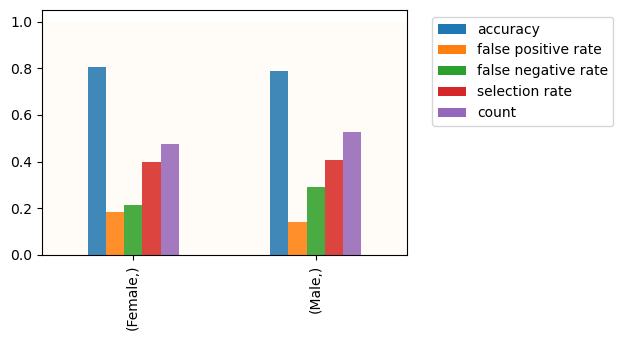

(           accuracy  false positive rate  false negative rate  selection rate  \
 (Female,)  0.807521             0.181920               0.2115        0.398450   
 (Male,)    0.790348             0.140995               0.2894        0.404515   
 
               count  
 (Female,)  0.474753  
 (Male,)    0.525247  ,
 {'equalized_odds_difference': (0.08,
   'The value of equalized_odds_difference is 0.08 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.'),
  'demographic_parity_difference': (0.01,
   'The value of demographic_parity_difference is 0.01 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.'),
  'equalized_odds_ratio': (0.78,
   'The value of equalized_odds_ratio is 0.78 which is less than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.'),
  'demographic_parity_rati

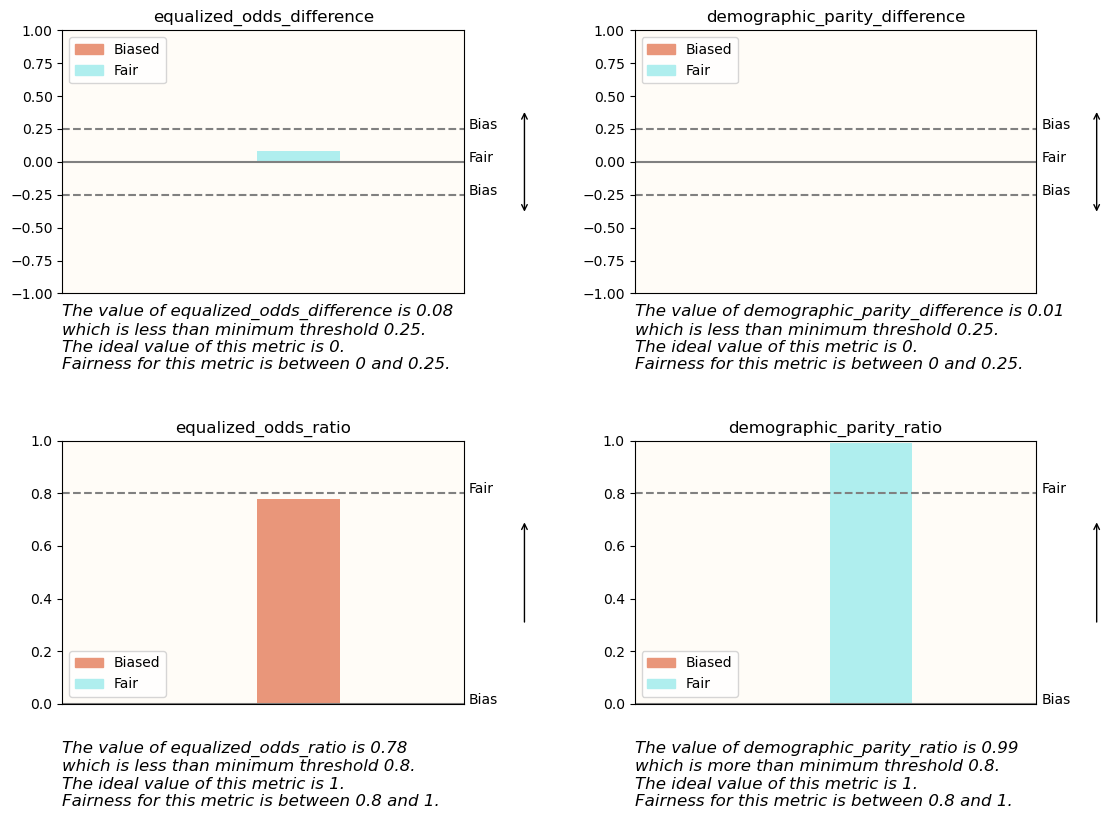

In [24]:
score = model.fairness_score(sensitive_feature = 'Gender',visualize=True)
scores.append(("exponentiated_gradient",score[1]))
score

##### Observations
1. `equalized_odds_difference` : 0.05
   Explanation : The value of equalized_odds_difference is 0.05 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.

2. `demographic_parity_difference` : 0.03
   Explanation : The value of demographic_parity_difference is 0.03 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.
   
3. `equalized_odds_ratio` : 0.79
   Explanation : The value of equalized_odds_ratio is 0.79 which is less than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.'
   
4. `demographic_parity_ratio` : 0.94
   Explanation : The value of demographic_parity_ratio is 0.94 which is more than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.
   

#### Using `Reweighing` as a bias mitigation technique. 

In [25]:
fairness_args = {
    'sensitive_feature': 'Gender',  
    'mitigation_type': "reweighing", #threshold_optimizer , #exponentiated_gradient
    'mitigation_constraint':'demographic_parity'
}
model=MLModel(data,"lightgbm.LGBMClassifier",fairness_args=fairness_args)

In [26]:
model.fit()

Fitting with reweighing


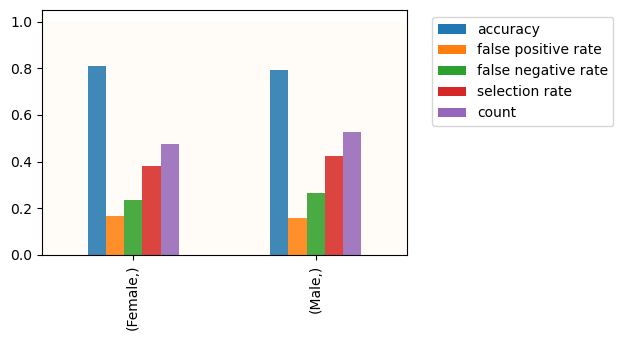

(           accuracy  false positive rate  false negative rate  selection rate  \
 (Female,)  0.809674             0.165402             0.235223        0.379360   
 (Male,)    0.791256             0.159826             0.265564        0.425662   
 
               count  
 (Female,)  0.474753  
 (Male,)    0.525247  ,
 {'equalized_odds_difference': (0.03,
   'The value of equalized_odds_difference is 0.03 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.'),
  'demographic_parity_difference': (0.05,
   'The value of demographic_parity_difference is 0.05 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.'),
  'equalized_odds_ratio': (0.96,
   'The value of equalized_odds_ratio is 0.96 which is more than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.'),
  'demographic_parity_rati

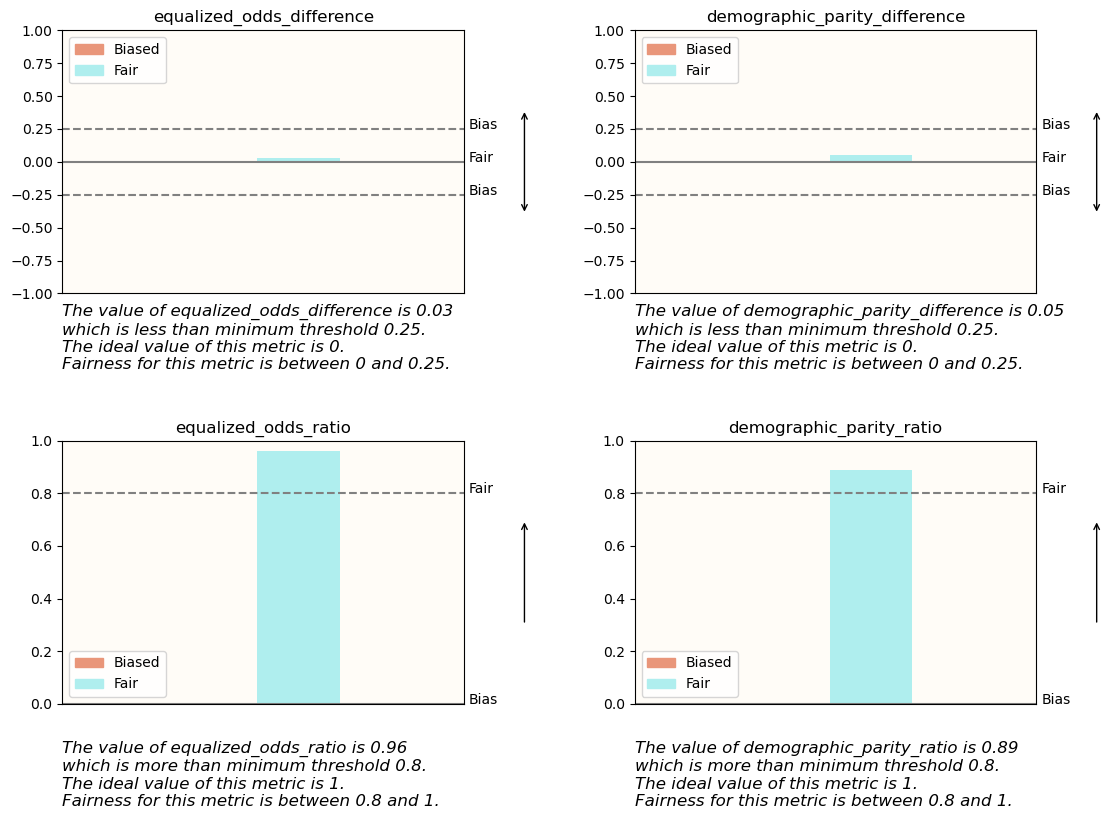

In [27]:
score = model.fairness_score(sensitive_feature = 'Gender',visualize=True)
scores.append(("reweighing",score[1]))
score

##### Observations

1. `equalized_odds_difference` : 0.01
   Explanation : The value of equalized_odds_difference is 0.01 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.
   
2. `demographic_parity_difference` : 0.06
   Explanation : The value of demographic_parity_difference is 0.06 which is less than minimum threshold 0.25. The ideal value of this metric is 0. Fairness for this metric is between 0 and 0.25.
   
3. `equalized_odds_ratio` : 0.92
   Explanation : The value of equalized_odds_ratio is 0.92 which is more than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.
   
4. `demographic_parity_ratio` : 0.87
   Explanation : The value of demographic_parity_ratio is 0.87 which is more than minimum threshold 0.8. The ideal value of this metric is 1. Fairness for this metric is between 0.8 and 1.'
   

### Following are the final numbers after testing different mitigation methods

In [28]:
metrics = ['equalized_odds_difference', 'demographic_parity_difference', 'equalized_odds_ratio', 'demographic_parity_ratio']

res = pd.DataFrame(columns=['method','equalized_odds_difference', 'demographic_parity_difference', 'equalized_odds_ratio', 'demographic_parity_ratio'])

In [29]:
methods = ["reweighing", 'threshold_optimizer' , 'exponentiated_gradient']

for met,score in scores:
    fms = [met]
    for m in metrics:
        fm = score[m][0]
        fms.append(fm)
    res.loc[len(res)]=fms
res


,method,equalized_odds_difference,demographic_parity_difference,equalized_odds_ratio,demographic_parity_ratio
0,unmitigated,0.06,0.12,0.68,0.73
1,threshold_optimizer,0.11,0.01,0.72,0.97
2,exponentiated_gradient,0.08,0.01,0.78,0.99
3,reweighing,0.03,0.05,0.96,0.89


### demographic_parity_difference of US states Without Fairness

Let us now generate the map illustrating the demographic parity difference across various states in the United States. In this representation, darker areas indicate higher demographic parity difference, suggesting a greater presence of biases. Conversely, lighter areas indicate lower bias. Following map is generated without utilizing any fairness methods.

In [30]:
base_layer = gis.content.get("e71d69b123ba41e0a123a0dfb16e2f35")

map_us = gis.map('US')
map_us.add_layer(base_layer)
display(map_us)

MapView(layout=Layout(height='400px', width='100%'))

### demographic_parity_difference of US states With Fairness

The subsequent map showcases the application of fairlearn bias mitigation methods to generate the demographic parity difference for all states within the United States.

In [31]:
fair_layer = gis.content.get("bfd255b57688457194e6a48d3fc7fcb4")

map_us = gis.map('US')
map_us.add_layer(fair_layer)
display(map_us)

MapView(layout=Layout(height='400px', width='100%'))